In [36]:
import pandas as pd
from scipy.stats import ttest_ind
%matplotlib inline


In [37]:
data = pd.read_csv('myDataFile.csv')

In [38]:
nans = lambda df: df[df.isnull().any(axis=1)]
nans(data)

,p_num,age_group,correlation
47,48,participant_rsv_124.mat,NaN
48,49,participant_rsv_128.mat,NaN


In [39]:
data.dropna(inplace = True)
data.reset_index(inplace = True);

In [40]:
data['pname'] = data.age_group

In [41]:
for idx,pname in enumerate(data.pname):
    pnumber = [s for s in pname if s.isdigit()]
    s = int(''.join(pnumber))
    if s >= 100:
        s = 'Old'
    else:
        s = 'Young'
    data.at[idx,'age_group']  = s


Old           AxesSubplot(0.1,0.15;0.363636x0.75)
Young    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

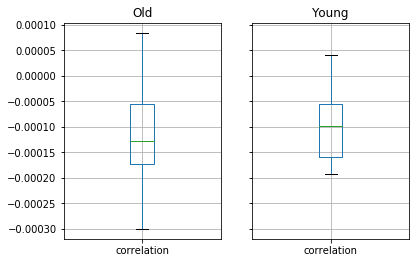

In [42]:
data.drop(['index','p_num'],axis = 1,inplace = True)
data.groupby('age_group').boxplot()

In [43]:
data_old = data[data['age_group'] == 'Old']
data_young = data[data['age_group'] == 'Young']

In [44]:
ttest_ind(data_old.correlation, data_young.correlation)

Ttest_indResult(statistic=-0.7850428483979293, pvalue=0.4348688502258853)

In [45]:
data.groupby('age_group').mean()

,correlation
age_group,
Old,-0.000115
Young,-0.000100


In [46]:
data.groupby('age_group').agg(['count'])

,correlation,pname
,count,count
age_group,,
Old,51,51
Young,27,27
